# TP3 METODOS NUMERICOS 
## Cuadrados Minimos

In [23]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: no se puede crear el directorio «build»: El fichero ya existe
-- The C compiler identification is GNU 10.2.0
-- The CXX compiler identification is GNU 10.2.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /usr/bin/python (found version "3.8.6") 
-- Found PythonLibs: /usr/lib/libpython3.8.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/duerunner/Documents/DAVID/TP3-MetNum
-- Configuring done
-- Generating done
-- Build files have been written to: /home/duerunner/Documents/DAVID/TP3-MetNum/build
Scanning depen

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum

/home/duerunner/Documents/DAVID/TP3-MetNum/notebooks
Python 3.8.6


## Exploración de Datos 
Veamos primero como se distribuye el dataset en cuestión

In [26]:
# Carquemos el dataset 
df_train = pd.read_csv("../data/train.csv")
# Veamos el tamaño
display("Dimensiones: ", df_train.shape)
# Y sus primeras filas 
pd.set_option("display.max.columns", None)
df_train.head(5)

'Dimensiones: '

(240000, 23)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,2.0,80.0,80.0,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,2.0,268.0,180.0,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,2.0,144.0,166.0,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,1.0,63.0,67.0,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,1.0,95.0,95.0,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [27]:
#Veamos ademas las columnas 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          240000 non-null  int64  
 1   titulo                      234613 non-null  object 
 2   descripcion                 238381 non-null  object 
 3   tipodepropiedad             239954 non-null  object 
 4   direccion                   186928 non-null  object 
 5   ciudad                      239628 non-null  object 
 6   provincia                   239845 non-null  object 
 7   antiguedad                  196445 non-null  float64
 8   habitaciones                217529 non-null  float64
 9   garages                     202235 non-null  float64
 10  banos                       213779 non-null  float64
 11  metroscubiertos             222600 non-null  float64
 12  metrostotales               188533 non-null  float64
 13  idzona        

In [28]:
# Veamos alguinas estadisticas basicas del dataset de tipo numerico 
display(df_train.describe())
# y para los estrings tambien
display(df_train.describe(include=np.object))

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,240000.000000,196445.000000,217529.000000,202235.000000,213779.000000,222600.000000,188533.000000,2.113790e+05,116512.000000,116512.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,2.400000e+05
mean,149969.382092,8.116114,2.902326,1.546874,2.132417,174.016774,176.765145,2.423468e+06,20.696818,-99.509221,0.062475,0.055092,0.087383,0.444142,0.396533,2.530838e+06
std,86634.579744,9.553830,0.896894,0.853507,0.912546,98.152950,94.427328,1.056794e+07,3.137884,9.744143,0.242017,0.228160,0.282397,0.496871,0.489179,2.152552e+06
min,1.000000,0.000000,1.000000,0.000000,1.000000,15.000000,15.000000,2.200000e+01,-100.886679,-125.859375,0.000000,0.000000,0.000000,0.000000,0.000000,3.100000e+05
25%,74930.750000,0.000000,2.000000,1.000000,1.000000,90.000000,102.000000,2.489000e+04,19.359846,-100.977908,0.000000,0.000000,0.000000,0.000000,0.000000,9.527725e+05
50%,149875.500000,5.000000,3.000000,2.000000,2.000000,153.000000,155.000000,5.638300e+04,19.543273,-99.240387,0.000000,0.000000,0.000000,0.000000,0.000000,1.850000e+06
75%,225016.500000,10.000000,3.000000,2.000000,3.000000,240.000000,238.000000,8.783800e+04,20.740005,-99.134777,0.000000,0.000000,0.000000,1.000000,1.000000,3.390000e+06
max,299999.000000,80.000000,10.000000,3.000000,4.000000,439.000000,439.000000,5.000400e+07,83.026219,121.036000,1.000000,1.000000,1.000000,1.000000,1.000000,1.252500e+07


,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,fecha
count,234613,238381,239954,186928,239628,239845,240000
unique,186191,232187,24,140269,875,32,1830
top,casa en venta,empresa dedicada a los ante notario y regist...,Casa,-,Querétaro,Distrito Federal,2016-12-03 00:00:00
freq,468,119,141717,660,12646,58790,1416


Eliminamos los datos incompletos   


In [46]:
df_train.dropna()
df_train.shape

(240000, 23)

## K-Fold Cross Validation
A la hora de realizar los experimentos al igual que en el tp anterior se debe usar cross-validation para evitar overfitting y obtener resultados estadisticamente mas robustos.

## Metricas
Se utilizan las funciones provistas por sklearn
###  RMSE 
- La raíz del error cuadrático medio 
###  RMSLE 
- Error logarítmico cuadrático medio

In [30]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error


def rmse(A,B):
    return np.sqrt(mean_squared_error(A, B))

def rmsle(A,B):
    return np.sqrt(mean_squared_log_error(A, B))

def cross_validate(K, X, Y, visualize = False):
    """
    Funcion custom para el TP 
    """
    def display_metrics(dict_k):
        """
        Funcion que permite visualizar la data
        """
        rmse, rmsle = dict_k["rmse"], dict_k["rmsle"]

        print(f"RMSE = {(np.mean(rmse), np.std(rmse))}")
        print(f"RMSLE = {(np.mean(rmsle), np.std(rmsle))}")

    # Usamos la funcion de skleanr para generar los splits 
    kfold = KFold(n_splits=K)
    kfold.get_n_splits(X)
    splits = kfold.split(X)

    #Almacenamos las metricas en arrays
    rmse_values = []
    rmsle_values = []
    
    for index_train, index_test in splits:
        # Tomamos el split correspondiente
        X_train, X_test = X[index_train], X[index_test]
        Y_train, Y_test = Y[index_train], Y[index_test]
        
        # Se calcula la prediccion
        regression = metnum.LinearRegression()
        regression.fit(X_train, Y_train)
        y_pred = regression.predict(X_test)          
        
        # Se evaluan las metricas
        rmse_values.append(rmse(Y_test, y_pred))
        rmsle_values.append(rmsle(Y_test, y_pred))
    
    #Lo guardamos en un dict de numpy arrays
    metrics_dict = {"RMSE": np.asarray(rmse_values), "RMSLE": np.asarray(rmsle_values)}
    
    if(visualize):
        print(metrics_dict)

    return metrics_dict


## Experimento 1: Prediccion de Precios por M^2
Nos interesa predecir los precios en base a los metros totales del inmueble. 

In [48]:

# Todos los datos son del conjunto de train ya que el de test no tiene los precios.
# Usamos un muestra de 200000 viviendas que no tengan datos faltantes  y 2 mil para testear

shuffle = df_train.sample(random_state=np.random.seed(42), frac=1)
new_train = shuffle.iloc[:20000, :]
new_test = shuffle.iloc[20000:22000, :]

x_train, x_test = new_train["metrostotales"].values, new_test["metrostotales"].values
y_train, y_test = new_train["precio"].values, new_test["precio"].values

In [58]:
# Veamo el dataset que nos queda
display(train["metrostotales"].describe())

count    20000.00000
mean       151.55165
std         80.61049
min         15.00000
25%         90.00000
50%        130.00000
75%        198.00000
max        439.00000
Name: metrostotales, dtype: float64

In [74]:
sns.set_theme(style="whitegrid")
train.describe()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04
mean,150267.200000,8.831750,2.873050,1.656600,2.000750,157.952550,151.55165,2.302070e+06,20.635478,-100.246117,0.068600,0.078500,0.094700,0.670300,0.637450,2.198163e+06
std,87203.882231,9.287484,0.825511,0.758159,0.853514,86.345885,80.61049,1.030697e+07,2.812479,5.357462,0.252779,0.268964,0.292807,0.470116,0.480748,1.816392e+06
min,2.000000,0.000000,1.000000,0.000000,1.000000,15.000000,15.00000,2.300000e+01,-21.677988,-121.883836,0.000000,0.000000,0.000000,0.000000,0.000000,3.100000e+05
25%,74188.750000,1.000000,2.000000,1.000000,1.000000,87.000000,90.00000,2.462600e+04,19.357114,-101.018008,0.000000,0.000000,0.000000,0.000000,0.000000,8.800000e+05
50%,150880.500000,5.000000,3.000000,2.000000,2.000000,140.000000,130.00000,5.567200e+04,19.534678,-99.238826,0.000000,0.000000,0.000000,1.000000,1.000000,1.650000e+06
75%,225676.750000,10.000000,3.000000,2.000000,3.000000,210.000000,198.00000,8.570900e+04,20.688461,-99.135311,0.000000,0.000000,0.000000,1.000000,1.000000,2.950000e+06
max,299972.000000,80.000000,10.000000,3.000000,4.000000,438.000000,439.00000,5.000400e+07,43.388968,2.757929,1.000000,1.000000,1.000000,1.000000,1.000000,1.252000e+07


<AxesSubplot:xlabel='metrostotales', ylabel='Count'>

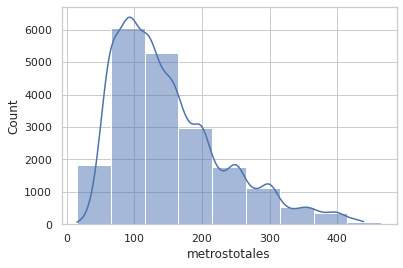

In [80]:
sns.histplot(data=train, x="metrostotales",binwidth=50,kde=True)

<AxesSubplot:xlabel='metrostotales', ylabel='precio'>

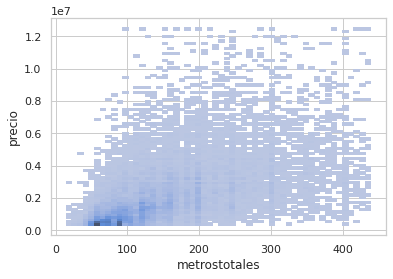

In [82]:
#Exploremos su relacion con los precios
sns.histplot(train, x="metrostotales", y="precio")

In [ ]:
sns.histplot(data=train, x="precio",bins=30,kde=True)

In [41]:
# Ahora queremos entrenar el modelo
modelo = metnum.LinearRegression()
modelo.fit(x_train, y_train)
y_pred = modelo.predict(x_test)
y_pred = y_pred.reshape(y_pred.shape[0])

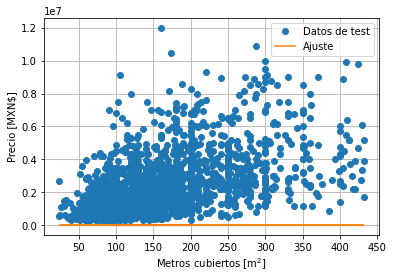

In [43]:
plt.figure("precio-metros-cubiertos")
plt.plot(x_test, y_test, "o", label="Datos de test")
plt.plot(x_test, y_pred, "-", label="Ajuste")
plt.grid()
plt.legend()
plt.xlabel(r"Metros cubiertos [$\mathrm{m}^2$]")
plt.ylabel("Precio [MXN$]")
#plt.savefig("Imagenes/Precio-en-Funcion-de-Metros-Cubiertos-con-outliers.png")
plt.show()